# BASEBALL WINNING ANALYSIS


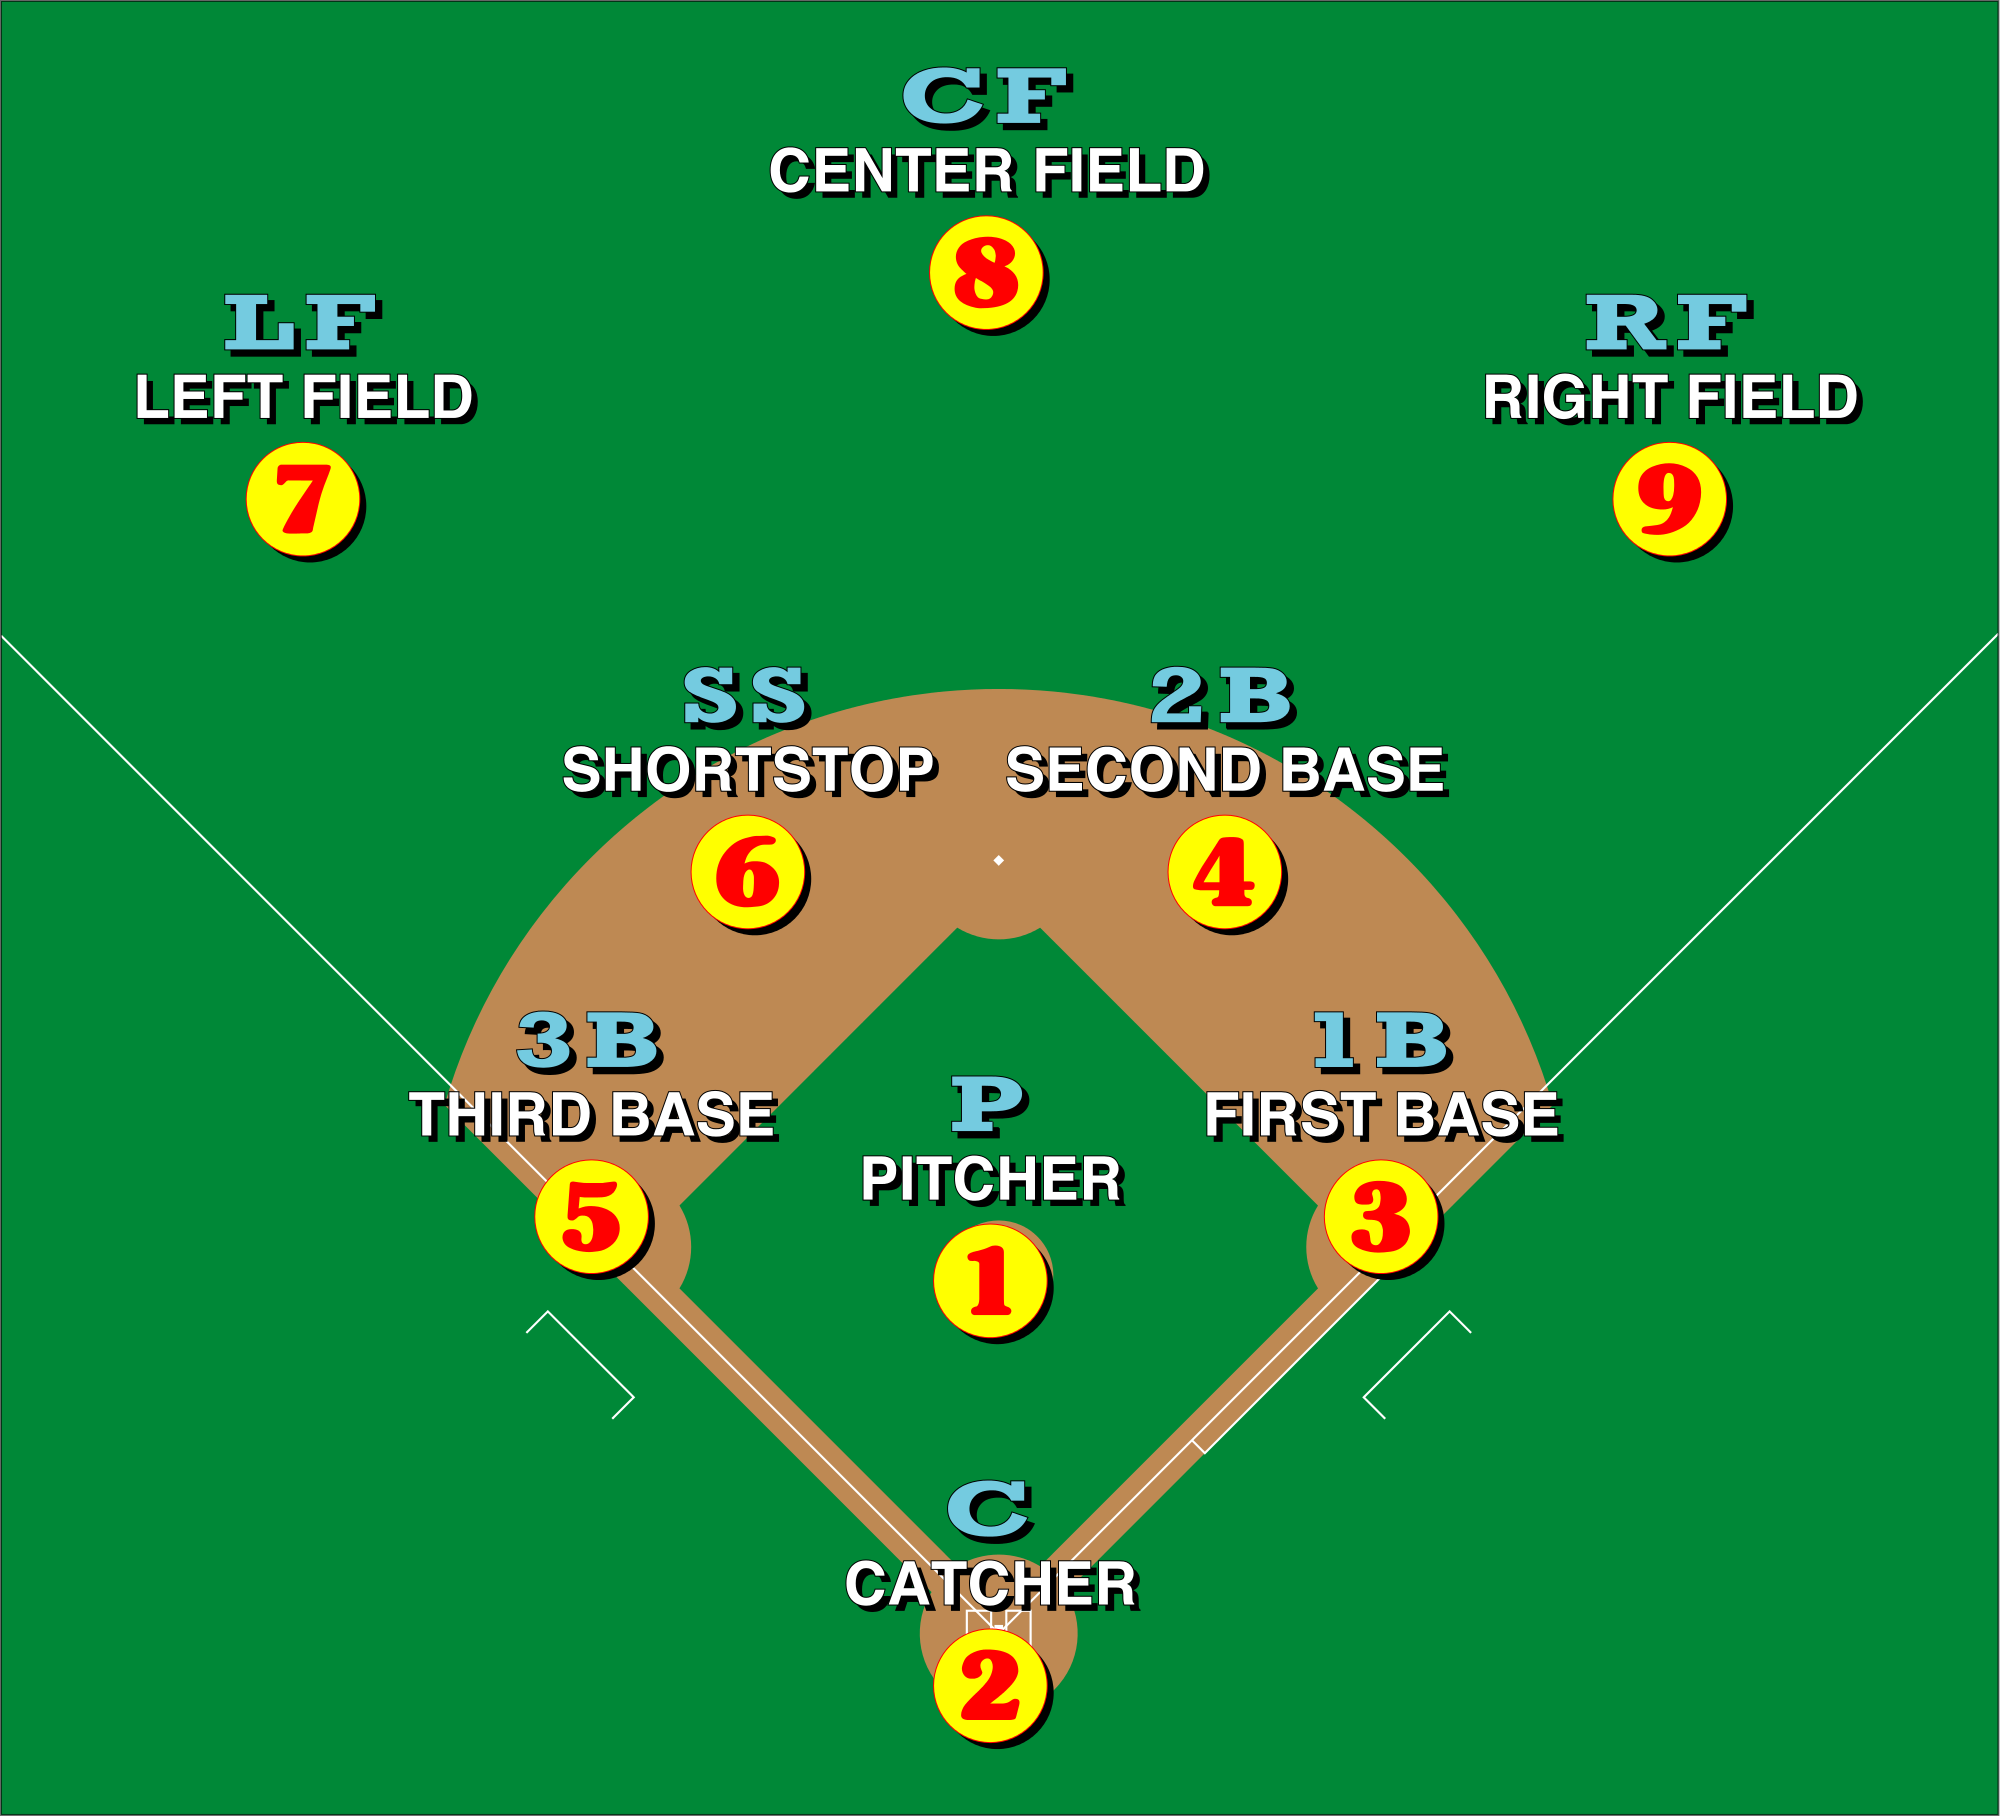

2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error

3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error

AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or 
obstruction

HR – At bats per home run: at bats divided by home runs

BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.

H (or HA) – Hits allowed: total hits allowed

ER – Earned run: number of runs that did not occur as a result of errors or passed balls

ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched

SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense

SO – Plate appearances per strikeout: number of times a batter strikes out to their plate appearance

R – Runs scored: number of times a player crosses home plate

RA – Run average: number of runs allowed times nine divided by innings pitched

SHO – Shutout: number of complete games pitched with no runs allowed

SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

CG – Complete game: number of games where player was the only pitcher for their team

W + S – Wins in relief + saves.

DETAIL OF COLUMNS...
WILL BE USING INITIALS AS GIVEN 

In [ ]:
!pip install xgboost

In [ ]:
#IMPORTING NEEDED LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#CALLING CSV FILE INTO DATAFRAME
df=pd.read_csv("baseball.csv")

In [ ]:
df.head()

# EDA

In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
df.dtypes

ALL NUMERIC DATA PRESENT 

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())


NO NULL PRESENT

In [ ]:
df.describe()

SOME OF THE COLUMN DATA SEEM TO BE ALMOST NORMALLY DISTRIBUTED OR LESS SKEWNESS PRESENT
WILL HAVE A LOOK IN MAP FORMAT FOR BETTER UNDERSTANDING 

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.describe(),cmap='Pastel1',linewidths=.2)



std for all columns is same in range i.e. less deviated or not.

H,R,AB,RA,ER are normally distributed as mean median and mode has same band




# DATA VISUALIZATION

In [ ]:

fig, axs = plt.subplots(3, 2, figsize=(18, 14))

sns.histplot(data=df, x="R", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="AB", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="H", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=df, x="2B", kde=True, ax=axs[1, 1], color='red')
sns.histplot(data=df, x="3B", kde=True, ax=axs[2, 0], color='black')
sns.histplot(data=df, x="HR", kde=True, ax=axs[2, 1], color='yellow')




RUNS(R),HITS(H) AND ATBATS PER HOME RUN(HR) ARE HAVING A LITTLE SKEWNESS PRESENT 

REST ALL SEEM TO BE NORMALLY DISTRIBUTED

In [ ]:

fig, axs = plt.subplots(3, 2, figsize=(18, 14))


sns.histplot(data=df, x="BB", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="SO", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="SB", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=df, x="RA", kde=True, ax=axs[1, 1], color='red')
sns.histplot(data=df, x="ER", kde=True, ax=axs[2, 0], color='black')
sns.histplot(data=df, x="ERA", kde=True, ax=axs[2, 1], color='yellow')


ER AND ERA ARE ALMOST SIMILAR VALUES

HIGHER SO WILL LEAD TO LESS ER

In [ ]:
plt.figure(figsize=(10,8))

sns.regplot(data=df,x='SO',y='ER',color='green')

HIGHER SO LEADS TO LESS ER

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(18, 14))


sns.histplot(data=df, x="CG", kde=True, ax=axs[0, 0], color='skyblue')
sns.histplot(data=df, x="SHO", kde=True, ax=axs[0, 1], color='orange')
sns.histplot(data=df, x="SV", kde=True, ax=axs[1, 0], color='red')
sns.histplot(data=df, x="E", kde=True, ax=axs[1, 1], color='black')
sns.histplot(data=df, x="W", kde=True, ax=axs[2, 0], color='yellow')

STARTING NUMBER OF STRIKING PLAYER MOSTLY TENDS TOWARDS WINNING

E ERRORS IS POSITIELY RELATED TO W

In [ ]:
plt.figure(figsize=(10,8))

sns.regplot(data=df,x='E',y='W',color='green')

MORE ERRORS WILL LEAD TO LOSE GAME

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=df,x='W',y='R')


IT IS OBVIOUS MOSTLY MORE RUNS WILL LEAD TO WINNINGS

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=df,x='3B',y='SB')


NUMBER OF STOLEN BASSES ARE HIGH AS THIRD BASE RUN INCREASES

LEADS TO MORE WIN

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x='ER',y='ERA')

ER AND ERA ARE ALMOST SIMILAR DATAS 

AS ER INCREASES EERA ALSO INCREASES

In [ ]:
plt.figure(figsize=(22,7))
df.corr()['W'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

E,SB,3B,ER,ERA,RA,AB ARE NEGATIVELY CORRELATED


In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(22,16))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

ERA AND ER ARE SIMILAR CAN DROP ONE

SO IS ALSO NOT MUCH CORRELATED TO ANY CAN DROP IT

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x='AB',y='E',)

AB IS SO UNPRIDICTABLE BUT SOMETIMES IT CAN B SEEN BECAUSE OF ERROR E

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(df['E'],color='green')

HERE ERRORS(E) HAS BEEN IN RANGE OF 60 TO 140 

AND IS ALMOST NORMALLY DISTRIBUTED

ALTHOUGH MODE IS HIGH COMPARED TO MEDIAN AND MEAN

In [ ]:
df.drop(['E'],axis=1,inplace=True)
df.drop(['ER'],axis=1,inplace=True)

df.head()

### OUTLIERS CHECK

In [ ]:
sns.set(style="darkgrid")
df.plot(kind='box',subplots=True,layout=(6,3),figsize=(10,15),color = 'green')
plt.tight_layout()

R,ERA,SV,SHO AND E ARE HAVING SOME OUTLIERS SO REMOVING IT
# APPLYING ZSCORE FOR REMOVING OUTLIERS

In [ ]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

In [ ]:
threshold=3
print(np.where(z>3))

In [ ]:
df1=df[(z<3).all(axis=1)]
x=df1
x.head()

## Feature and labeling of dataframe

In [ ]:

# splittig the target variables
y = df['W']
x = df.drop(['W'], axis = 1)

# lets check teh shape of the new var
print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

## CHECKING SKEWNESS

In [ ]:
df1.skew()

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df1[column],color='red')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

ALMOST ALL DATA ARE NORMALLY DISTRIBUTED

EXCEPT WITH SOME CASES OF RUNS(R) HAS A LITTLE SKEWNESS

HITS(H) HAS SOME DEVAITION



# Removing skewness


In [ ]:
from sklearn.preprocessing import power_transform

df1=power_transform(x,method='yeo-johnson')
df1

## SCALING DATA

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

# Model Building

In [ ]:
# importing all the required libraries of models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet 
from sklearn.model_selection import KFold, cross_val_score

from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score,mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# creating instances of models
models = [('lr',LinearRegression()),('ridge',Ridge()),('lasso',Lasso()),('rfr',RandomForestRegressor()),
         ('br',BaggingRegressor()),('gbr',GradientBoostingRegressor()),('en',ElasticNet())]

In [ ]:
#function to return best score of individual models
def model_selection(md,model):
    best_score=0
    for i in range(201):
        from sklearn.model_selection import train_test_split
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = i)
        
        md = model
        md.fit(x_train,y_train)
        b_score=md.score(x_test,y_test)
        pred_md = md.predict(x_test)
        b_score
        if b_score>best_score:
            best_score=b_score
            random_state=i
    print("Best Score for model ",model," is = {} For Random state = {}".format(best_score*100,random_state))
    
  

In [ ]:
for i,j in models:
    model_selection(i,j)

# splitting dataframe 
train test split

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=167)


# MODEL SELECTION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error



lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)


print('Score: ',lr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predlr))
# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,predlr))
print('Mean squared error:', mean_squared_error(y_test,predlr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predlr)))

In [ ]:

from sklearn.tree import DecisionTreeRegressor

dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
dtc_pred=dtc.predict(x_test)


print('score : ',dtc.score(x_train,y_train))
print('r2 score : ',r2_score(y_test,dtc_pred))
# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,dtc_pred))
print('Mean squared error:', mean_squared_error(y_test,dtc_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,dtc_pred)))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('Score: ',rf.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predrf))
# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,predrf))
print('Mean squared error:', mean_squared_error(y_test,predrf))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predrf)))

In [ ]:
from sklearn.svm import SVR
svr= SVR()
svr.fit(x_train,y_train)
preds= svr.predict(x_test)
print('Score: ',svr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preds))
# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,preds))
print('Mean squared error:', mean_squared_error(y_test,preds))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,preds)))

In [ ]:
# Regularization

from sklearn.linear_model import Lasso

ls= Lasso()
ls.fit(x_train,y_train)
predls= ls.predict(x_test)
print('Score: ',ls.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predls))
# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,predls))
print('Mean squared error:', mean_squared_error(y_test,predls))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predls)))

In [ ]:
# Regularization

from sklearn.linear_model import Ridge

rd= Ridge()
rd.fit(x_train,y_train)
predrd= rd.predict(x_test)
print('Score: ',rd.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predrd))
# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,predrd))
print('Mean squared error:', mean_squared_error(y_test,predrd))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predrd)))

# Hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

parrf={'criterion' : ["mse", "mae"], 'max_features':['auto','sqrt','log2']}
gcvrf= GridSearchCV(rf,parrf) 
gcvrf.fit(x_train,y_train)
gcvrf.best_params_

In [ ]:
parsvr={'kernel' : ["linear", "poly",'rbf'], 'gamma':['auto','scale']}
gcvsvr= GridSearchCV(svr,parsvr) 
gcvsvr.fit(x_train,y_train)
gcvsvr.best_params_

In [ ]:
parls={'alpha' : [0.0001,0.001,0.01,0.1,1]}
gcvls= GridSearchCV(ls,parls) 
gcvls.fit(x_train,y_train)
gcvls.best_params_

# Now using the above parameters which are found to be best

In [ ]:
mod1= RandomForestRegressor(criterion='mae', max_features='sqrt', random_state=163)
mod1.fit(x_train,y_train)
pred1=mod1.predict(x_test)
print('Score: ',mod1.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,pred1))

In [ ]:
mod2= Lasso(alpha=1, random_state=167)
mod2.fit(x_train,y_train)
pred2=mod2.predict(x_test)
print('Score: ',mod2.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,pred2))

In [ ]:
mod3= SVR(kernel='linear', gamma='auto')
mod3.fit(x_train,y_train)
pred3=mod3.predict(x_test)
print('Score: ',mod3.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,pred3))

### model_2 is dong well i.e. ridge regression

In [ ]:
# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,pred2))
print('Mean squared error:', mean_squared_error(y_test,pred2))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred2)))

# Cross Validation



In [ ]:
# LINEAR REGRESSION


test_accuracy= r2_score(y_test,predlr)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

In [ ]:
# DESICION TREE

test_accuracy= r2_score(y_test,dtc_pred)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(dtc,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

In [ ]:
# RANDOM FOREST REGRESSOR
test_accuracy= r2_score(y_test,predrf)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

In [ ]:
# SUPPORT VECTOR REGRESSOR
test_accuracy= r2_score(y_test,preds)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(svr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

In [ ]:
#Lasso REGRESSOR
test_accuracy= r2_score(y_test,predls)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(ls,x,y,cv=i,n_jobs=5)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

In [ ]:
#RIDGE REGRESSOR
test_accuracy= r2_score(y_test,predrd)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(rd,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

##### LASSO REGRESSION IS PERFORMING BETTER
CV SCORE--80.1

R2 SCORE-95.5

HENCE BEST MODEL



### so the best model with less difference between r2 score and cv score is LASSO REGRESSOR

In [ ]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test, y= predls, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

## Best fit Line

# Saving Best Model


In [ ]:
import pickle
filename='Baseball_win.pkl'
pickle.dump(ls,open(filename,'wb'))

In [ ]:
import numpy as np
a=np.array(y_test)
predicted= np.array(ls.predict(x_test))
df_check= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_check